In [1]:
w_td = [0.814723686393179,
0.905791937075619,
0.126986816293506,
0.913375856139019,
0.632359246225410,
0.0975404049994095,
0.278498218867048,
0.546881519204984,
0.957506835434298,
0.964888535199277,
0.157613081677548,
0.970592781760616,
0.957166948242946,
0.485375648722841,
0.800280468888800,
0.141886338627215,
0.421761282626275,
0.915735525189067,
0.792207329559554,
0.959492426392903,
0.655740699156587,
0.0357116785741896,
0.849129305868777,
0.933993247757551,
0.678735154857774,
0.757740130578333,
0.743132468124916,
0.392227019534168,
0.655477890177557,
0.171186687811562,
0.706046088019609,
0.0318328463774207]

c:\Users\pdidier\Anaconda3\envs\danse_env_conda\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


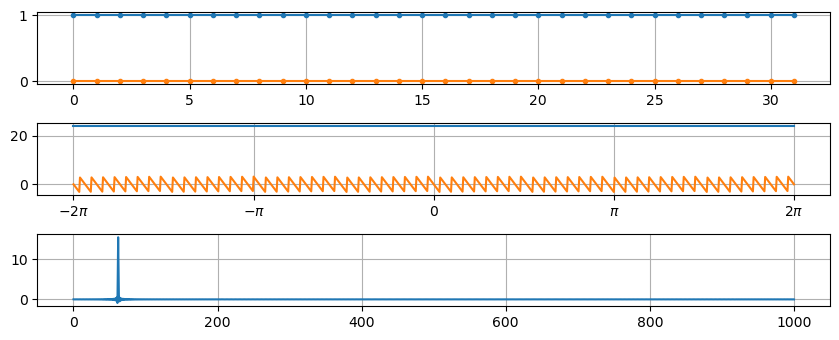

In [2]:
import numpy as np
import scipy.linalg
import copy
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('default')  # <-- for Jupyter: white figures background

Nh = 2**5
h = np.sqrt(np.hanning(Nh))
f = copy.copy(h)
w = np.fft.fft(w_td, Nh, axis=0)
w = np.ones_like(w)     # <-- uncomment to apply no filtering

# Compute IDFT of `w`
w_td2 = np.fft.ifft(w, Nh, axis=0)
w_td2 = np.real_if_close(w_td2)

T_fct = lambda z : np.flip(z ** (- np.arange(Nh))) @\
                    np.diag(f) @\
                    scipy.linalg.circulant(w_td2) @\
                    np.diag(h) @\
                    (z ** (- np.arange(Nh))).T

m = 1001
om = np.linspace(-2 * np.pi, 2 * np.pi, num=m)
allz = np.exp(1j * om)

out = np.zeros(len(allz), dtype=complex)
for ii in range(len(out)):
    out[ii] = T_fct(allz[ii])

fig, axes = plt.subplots(3,1)
fig.set_size_inches(8.5, 3.5)
axes[0].plot(np.real(np.fft.fftshift(w)), '.-')
axes[0].plot(np.imag(np.fft.fftshift(w)), '.-')
axes[0].grid()
axes[1].plot(om, 20 * np.log10(np.abs(out)))
axes[1].plot(om, np.angle(out))
axes[1].grid()
axes[1].set_xticks([-2*np.pi, -np.pi, 0, np.pi, 2*np.pi])
axes[1].set_xticklabels(['$-2\pi$', '$-\pi$', '0', '$\pi$', '$2\pi$'])
myIR = np.fft.ifft(np.fft.ifftshift(out), m, axis=0)
myIR = np.real_if_close(myIR)
axes[2].plot(myIR)
axes[2].grid()
plt.tight_layout()	
plt.show()